<a href="https://colab.research.google.com/github/vanshdhiman090/bank_churn_analysis_with_python/blob/main/bankchurn_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Bank Customer Churn Prediction.csv")
display(df)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [4]:
print(df.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [5]:
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [6]:
print(df.shape)

(10000, 12)


Which country has high churn rate

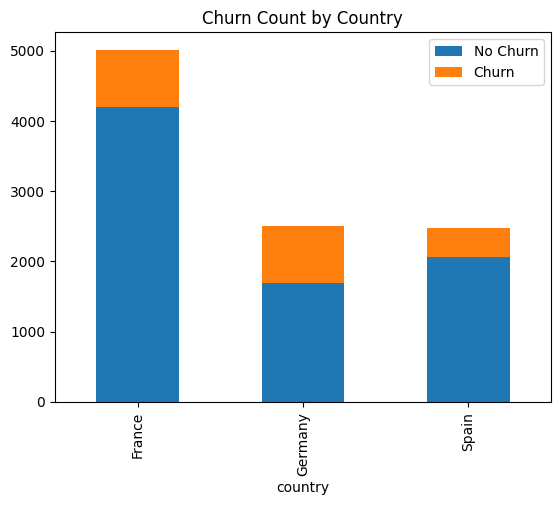

In [7]:
import matplotlib.pyplot as plt

df.groupby(['country','churn']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Churn Count by Country')
plt.legend(['No Churn', 'Churn'])
plt.show()


In [8]:
print(df.groupby(['gender', 'churn']).size().reset_index(name='count'))

   gender  churn  count
0  Female      0   3404
1  Female      1   1139
2    Male      0   4559
3    Male      1    898


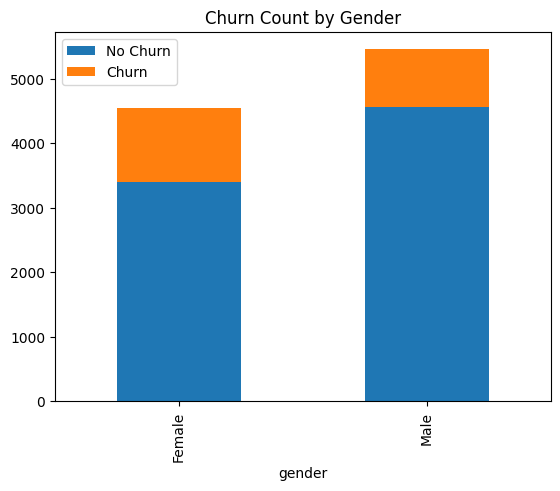

In [9]:
df.groupby(['gender', 'churn']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Churn Count by Gender')
plt.legend(['No Churn', 'Churn'])
plt.show()

*Correlation*

In [10]:
numeric_df = df.select_dtypes(include=['number'])
correlations = numeric_df.corr()['churn'].sort_values(ascending=False)
print(correlations)
print('-----Correlation between credit score and balance-------')
corr = df['credit_score'].corr(df['balance'])
print("Correlation:", corr)
print('-----Correlation between age and salary-------')
corr = df['age'].corr(df['estimated_salary'])
print("Correlation:", corr)
print('-----Correlation between tenure and balance-------')
corr = df['tenure'].corr(df['balance'])
print("Correlation:", corr)


churn               1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
customer_id        -0.006248
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64
-----Correlation between credit score and balance-------
Correlation: 0.006268381616008728
-----Correlation between age and salary-------
Correlation: -0.007201042376657299
-----Correlation between tenure and balance-------
Correlation: -0.012253926175215412


churn persentage

In [11]:
print(df['churn'].value_counts())
print(df['churn'].value_counts(normalize=True) * 100)


churn
0    7963
1    2037
Name: count, dtype: int64
churn
0    79.63
1    20.37
Name: proportion, dtype: float64


Average credit score (churned vs non churn)

In [12]:
print('Normal average of Credit score = ', df['credit_score'].mean())

print('''Average Credit Non_Churn vs Churn''',df.groupby('churn')['credit_score'].mean())

Normal average of Credit score =  650.5288
Average Credit Non_Churn vs Churn churn
0    651.853196
1    645.351497
Name: credit_score, dtype: float64


logistic Model between credit_score and churn

In [13]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = df[['credit_score']]  # feature
y = df['churn']  # target

model = LogisticRegression()
model.fit(X, y)

print("Coefficient for credit_score:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient for credit_score: [[-0.00069557]]
Intercept: [-0.91217658]


Average balance  (churned vs non churn)

In [14]:
print('Normal average of balance= ',df['balance'].mean())
print('''Average Balance Non_Churn vs Churn''',df.groupby('churn')['balance'].mean())
print('---------------------------------------')
print('Normal median of balance= ',df['balance'].median())
print('''Meadin Balance Non_Churn vs Churn''',df.groupby('churn')['balance'].median())


Normal average of balance=  76485.889288
Average Balance Non_Churn vs Churn churn
0    72745.296779
1    91108.539337
Name: balance, dtype: float64
---------------------------------------
Normal median of balance=  97198.54000000001
Meadin Balance Non_Churn vs Churn churn
0     92072.68
1    109349.29
Name: balance, dtype: float64


mutivariable logistic Model for balance

In [15]:
from sklearn.linear_model import LogisticRegression

X = df[['balance', 'tenure', 'active_member']]
y = df['churn']

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[ 4.89596555e-06 -1.56419003e-02 -7.96840992e-01]]
Intercept: [-1.32315408]


average tenure

In [16]:
print('Normal average of tenure= ',df['tenure'].mean())
print('''Average tenure Non_Churn vs Churn''',df.groupby('churn')['tenure'].mean())

Normal average of tenure=  5.0128
Average tenure Non_Churn vs Churn churn
0    5.033279
1    4.932744
Name: tenure, dtype: float64


average products

In [17]:
print('Normal average of products_number    = ',df['products_number'].mean())
print('''Average products_number Non_Churn vs Churn''',df.groupby('churn')['products_number'].mean())

Normal average of products_number    =  1.5302
Average products_number Non_Churn vs Churn churn
0    1.544267
1    1.475209
Name: products_number, dtype: float64


active member

In [18]:
print('Normal average of active_member    = ',df['active_member'].mean())
print('''Average active_member Non_Churn vs Churn''',df.groupby('churn')['active_member'].mean())

Normal average of active_member    =  0.5151
Average active_member Non_Churn vs Churn churn
0    0.554565
1    0.360825
Name: active_member, dtype: float64


Average age

In [19]:
print('Normal average of age    = ',df['age'].mean())
print('''Average age Non_Churn vs Churn''',df.groupby('churn')['age'].mean())

Normal average of age    =  38.9218
Average age Non_Churn vs Churn churn
0    37.408389
1    44.837997
Name: age, dtype: float64


logistict model on Age

In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = df[['age']]  # feature
y = df['churn']  # target

model = LogisticRegression()
model.fit(X, y)

print("Coefficient for age:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient for age: [[0.06294475]]
Intercept: [-3.92860441]


High balance customers not churn rate


In [21]:
threshold = df['balance'].quantile(0.75)

high_balance = df[df['balance'] >= threshold]

retention_rate = (len(high_balance[high_balance['churn']==0]) / len(high_balance)) * 100
print("High Balance Customer Retention Rate:", retention_rate, "%")


High Balance Customer Retention Rate: 76.32 %


logistic  model

1. Customer Segmentation & Risk Profiles

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = df[['balance','tenure','credit_score','age','products_number','active_member']]
y = df['churn']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_prob = rf_model.predict_proba(X)[:,1]
# Example thresholds
df['churn_risk'] = pd.cut(y_prob, bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])
print(df['churn_risk'].value_counts())

churn_risk
Low       6086
High      1568
Medium     510
Name: count, dtype: int64


/tmp/ipython-input-649217865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn_risk', data=df, order=['Low', 'Medium', 'High'], palette='viridis')


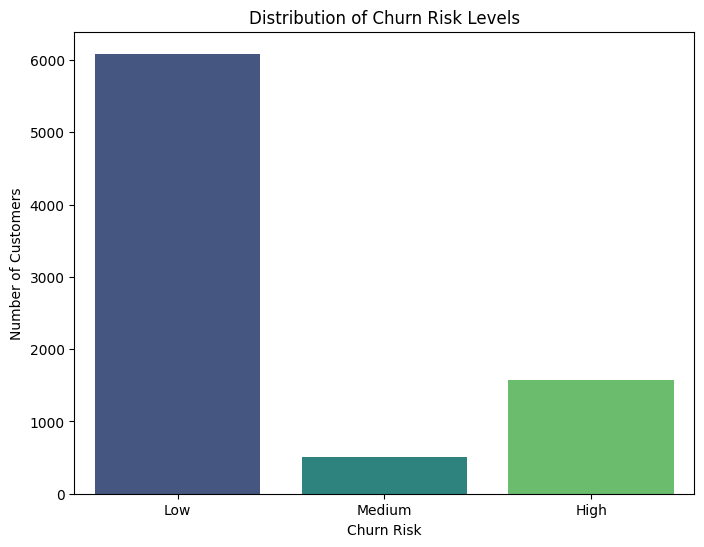

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='churn_risk', data=df, order=['Low', 'Medium', 'High'], palette='viridis')
plt.title('Distribution of Churn Risk Levels')
plt.xlabel('Churn Risk')
plt.ylabel('Number of Customers')
plt.show()

Do younger vs older customers churn for different reasons ?


Top drivers of churn for Young customers:
estimated_salary    0.260690
credit_score        0.256585
balance             0.240806
dtype: float64


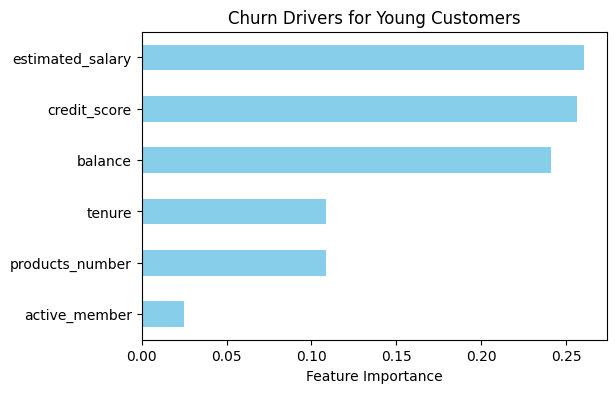


Top drivers of churn for Old customers:
active_member       0.296342
estimated_salary    0.178140
credit_score        0.174500
dtype: float64


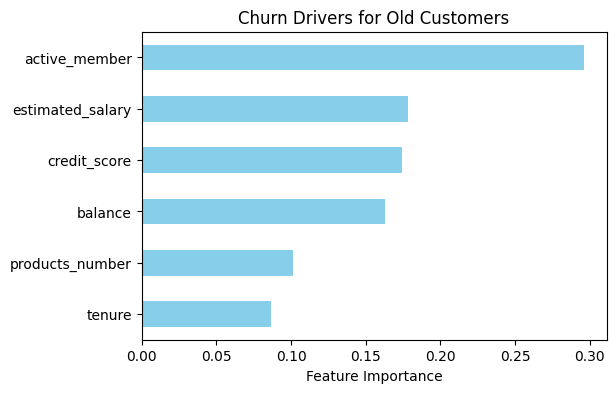

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

bins = [18, 30, 50, 100]
labels = ['Young', 'Middle-aged', 'Old']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

features = ['balance', 'tenure', 'credit_score', 'products_number', 'active_member', 'estimated_salary']

for group in ['Young', 'Old']:
    group_data = df[df['age_group'] == group]
    X = group_data[features]
    y = group_data['churn']

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X, y)

    importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

    print(f"\nTop drivers of churn for {group} customers:")
    print(importance.head(3))


    plt.figure(figsize=(6,4))
    importance.sort_values().plot(kind='barh', color='skyblue')
    plt.title(f"Churn Drivers for {group} Customers")
    plt.xlabel("Feature Importance")
    plt.show()


2. Behavioral Drivers of Churn

Financial behavior importance: 0.4706432998122469
Engagement behavior importance: 0.17360692384524873
Other factors importance: 0.3557497763425044


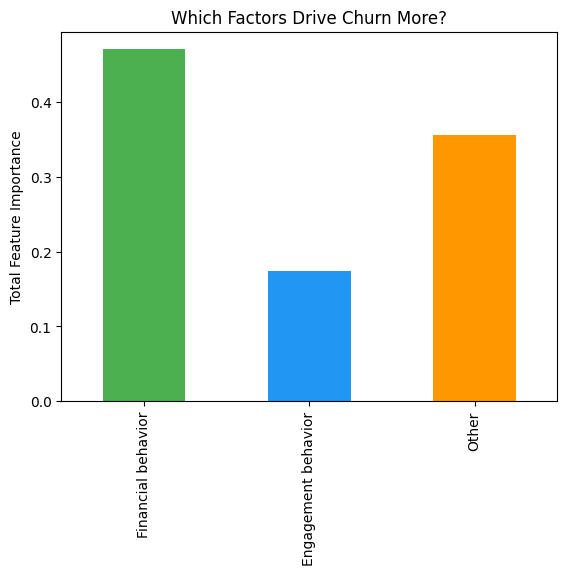

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Define feature groups
financial_features = ['balance', 'credit_score']
engagement_features = ['active_member', 'products_number']
other_features = ['tenure', 'estimated_salary']  # optional

# Features and target
X = df[financial_features + engagement_features + other_features]
y = df['churn']

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)

# Grouped importance
financial_importance = importance[financial_features].sum()
engagement_importance = importance[engagement_features].sum()
other_importance = importance[other_features].sum()

print("Financial behavior importance:", financial_importance)
print("Engagement behavior importance:", engagement_importance)
print("Other factors importance:", other_importance)

# Compare visually
import matplotlib.pyplot as plt

group_importance = pd.Series({
    "Financial behavior": financial_importance,
    "Engagement behavior": engagement_importance,
    "Other": other_importance
})

group_importance.plot(kind='bar', color=['#4CAF50','#2196F3','#FF9800'])
plt.title("Which Factors Drive Churn More?")
plt.ylabel("Total Feature Importance")
plt.show()


customer_type
High Balance & Inactive    0.323290
Low Balance & Inactive     0.212286
High Balance & Active      0.178852
Low Balance & Active       0.107403
Name: churn, dtype: float64


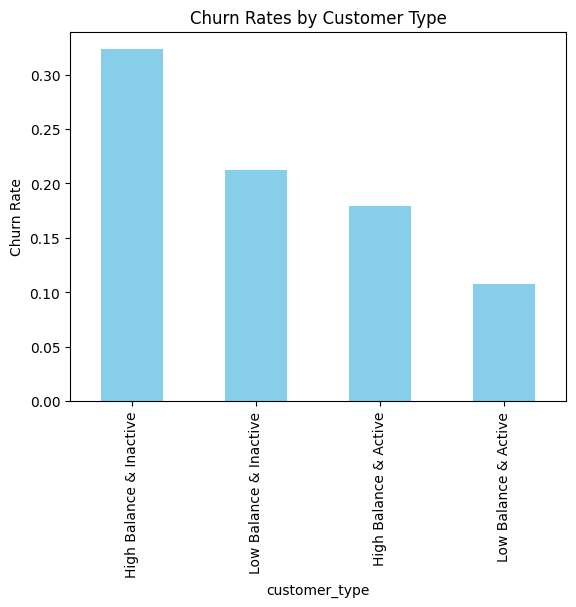

In [26]:
import pandas as pd
import numpy as np

# Define thresholds (e.g., median split)
balance_threshold = df['balance'].median()

df['balance_group'] = np.where(df['balance'] >= balance_threshold, 'High Balance', 'Low Balance')
df['activity_group'] = np.where(df['active_member'] == 1, 'Active', 'Inactive')

# Combine groups
df['customer_type'] = df['balance_group'] + " & " + df['activity_group']

churn_rates = df.groupby('customer_type')['churn'].mean().sort_values(ascending=False)
print(churn_rates)
import matplotlib.pyplot as plt

churn_rates.plot(kind='bar', color='skyblue')
plt.title("Churn Rates by Customer Type")
plt.ylabel("Churn Rate")
plt.show()


3. Predictive Power & Feature Importance


Feature importance in churn model:
age                 0.253258
estimated_salary    0.237241
credit_score        0.225381
balance             0.182545
tenure              0.101574
dtype: float64


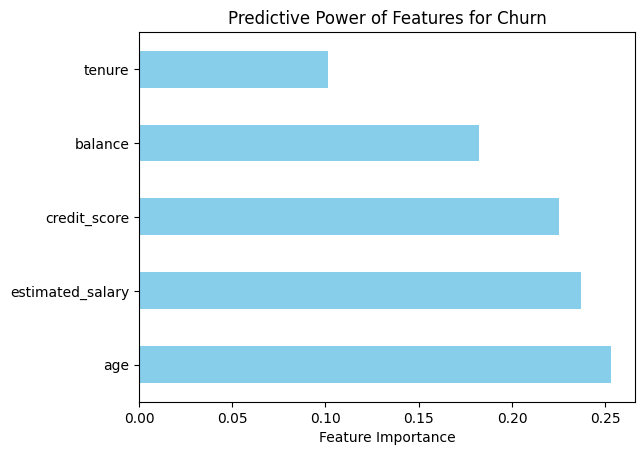

In [27]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Features to test
features = ['credit_score', 'balance', 'tenure', 'age', 'estimated_salary']
X = df[features]
y = df['churn']

# Train model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

# Feature importance
importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

print("Feature importance in churn model:")
print(importance)

# Visualization
importance.plot(kind='barh', color='skyblue')
plt.title("Predictive Power of Features for Churn")
plt.xlabel("Feature Importance")
plt.show()


In [28]:
churned_balance = df.loc[df['churn'] == 1, 'balance'].sum()
total_balance = df['balance'].sum()

percent_at_risk = churned_balance / total_balance * 100

print("Balance at risk due to churn:", churned_balance)
print("Percent of total balance at risk:", percent_at_risk, "%")


Balance at risk due to churn: 185588094.63
Percent of total balance at risk: 24.26435730271586 %


tenure_group
Short (0-3)     0.208926
Medium (4-6)    0.204852
Long (7-10)     0.195067
Name: churn, dtype: float64


/tmp/ipython-input-4217566900.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_tenure = df.groupby('tenure_group')['churn'].mean()


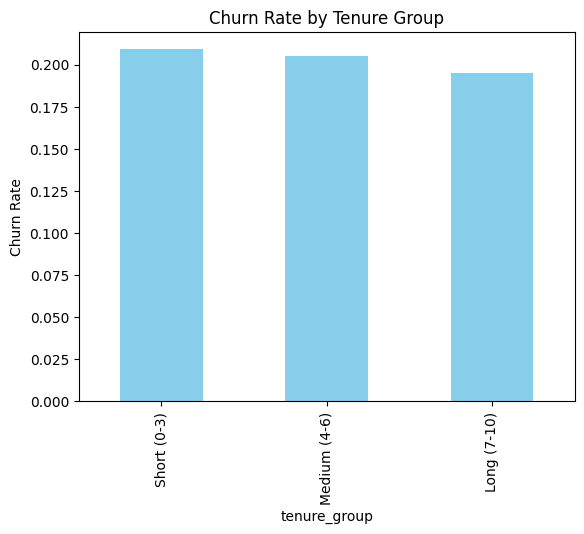

In [29]:
import pandas as pd

# Create tenure groups
bins = [0, 3, 6, 10]
labels = ['Short (0-3)', 'Medium (4-6)', 'Long (7-10)']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Churn rate in each tenure group
churn_rate_by_tenure = df.groupby('tenure_group')['churn'].mean()
print(churn_rate_by_tenure)

churn_rate_by_tenure.plot(kind='bar', color='skyblue')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.show()


/tmp/ipython-input-89211954.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('age_group')['churn'].mean()
/tmp/ipython-input-89211954.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('tenure_group')['churn'].mean()


Churn by Age Group:
 age_group
(18, 25]     0.074703
(25, 35]     0.084980
(35, 45]     0.196199
(45, 55]     0.505721
(55, 65]     0.483209
(65, 100]    0.132576
Name: churn, dtype: float64

Churn by Tenure Group:
 tenure_group
(0, 2]     0.207873
(2, 4]     0.208208
(4, 6]     0.204649
(6, 8]     0.182172
(8, 10]    0.213026
Name: churn, dtype: float64


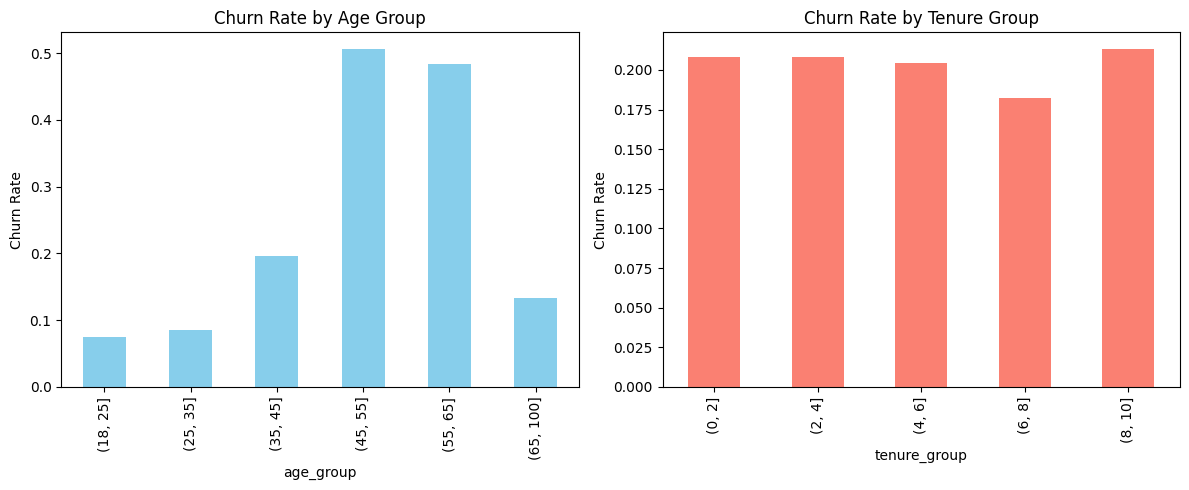

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

age_bins = [18, 25, 35, 45, 55, 65, 100]
df['age_group'] = pd.cut(df['age'], bins=age_bins)

tenure_bins = [0, 2, 4, 6, 8, 10]
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins)


age_churn = df.groupby('age_group')['churn'].mean()
tenure_churn = df.groupby('tenure_group')['churn'].mean()

print("Churn by Age Group:\n", age_churn)
print("\nChurn by Tenure Group:\n", tenure_churn)


fig, axes = plt.subplots(1, 2, figsize=(12,5))

age_churn.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title("Churn Rate by Age Group")
axes[0].set_ylabel("Churn Rate")

tenure_churn.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title("Churn Rate by Tenure Group")
axes[1].set_ylabel("Churn Rate")

plt.tight_layout()
plt.show()
